### Documentation:
#### Data Set: 9.random
#### Description:

### Importing Libraries: The required libraries are imported at the beginning of the code.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the Dataset:
- The code reads a CSV file using Pandas, assuming the file is located at "C:\\Users\\dell\\Downloads\\Deep Learning data\\9.random.csv". The dataset is stored in the DataFrame df.

In [34]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Deep Learning data\\9.random.csv",header = None)


#### The first few rows of the DataFrame are displayed using the head() function.

In [35]:
df.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


#### Gives the dimensions of the dataset (number of rows, number of columns).


In [3]:
df.shape

(400, 3)

#### Provides information about the dataset, including the data types of each column and the number of non-null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column. 

In [5]:
df.describe()

,0,1,2
count,400.000000,400.000000,400.000000
mean,0.473766,0.678849,0.505000
std,0.303491,0.277019,0.500601
min,-0.206000,0.094500,0.000000
25%,0.247000,0.429750,0.000000
50%,0.488000,0.692500,1.000000
75%,0.726500,0.922250,1.000000
max,1.100000,1.240000,1.000000


In [6]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Data Visualization:
- A scatter plot is created using Seaborn to visualize the data points, where the x-axis represents df[0], the y-axis represents df[1], and the color of the points is determined by df[2]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

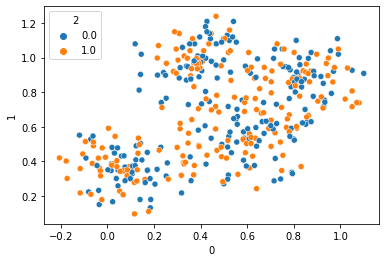

In [8]:
sns.scatterplot(df[0],df[1],hue = df[2])

### Train-Test Split:
- The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features (x_train, x_test) consist of columns 0 and 1 from the DataFrame, while the target variables (y_train, y_test) correspond to column 2. The testing set size is set to 20% of the total dataset.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.2)

### Data Preprocessing:
- The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).

In [10]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_trains =std.fit_transform(X_train)
X_tests =std.transform(X_test)

### Importing the necessary libraries:
- tensorflow and keras: Deep learning libraries.
- Sequential from keras.models: To create a sequential neural network model.
- Dense from keras.layers: Fully connected layer for the neural network.


In [11]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### Defining the model architecture:

- model = Sequential(): Creating a sequential model.
- model.add(Dense(5, ...)): Adding a dense layer with 5 neurons, ReLU activation, He uniform kernel initializer, and input dimension of 2.
- model.add(Dense(4, ...)): Adding a dense layer with 4 neurons, ReLU activation, and He uniform kernel initializer.
- model.add(Dense(3, ...)): Adding a dense layer with 3 neurons, ReLU activation, and He uniform kernel initializer.
- model.add(Dense(2, ...)): Adding a dense layer with 2 neurons, ReLU activation, and He uniform kernel initializer.
- model.add(Dense(1, ...)): Adding a dense layer with 1 neuron, sigmoid activation.

In [23]:
model=Sequential()
model.add(Dense(5,activation="relu",kernel_initializer='he_uniform',input_dim=2))

model.add(Dense(4,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(3,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(2,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(1,activation="sigmoid"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 15        
                                                                 
 dense_6 (Dense)             (None, 4)                 24        
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
 dense_8 (Dense)             (None, 2)                 8         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


### Compiling the model:

- Compiling the model with Adam optimizer, binary cross-entropy loss function, and accuracy metric.

In [25]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

### Training the model:

- history = model.fit(...): Training the model on X_trains and y_train data with specified batch size, number of epochs, and validation split.

In [26]:
history=model.fit(X_trains,y_train,batch_size=10,epochs=50,validation_split=0.2)

Epoch 1/50
26/26 [==============================] - 0s 5ms/step - loss: 0.7084 - accuracy: 0.4766 - val_loss: 0.7000 - val_accuracy: 0.5156
Epoch 2/50
26/26 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.4766 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 3/50
26/26 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.4883 - val_loss: 0.6940 - val_accuracy: 0.5156
Epoch 4/50
26/26 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.4922 - val_loss: 0.6926 - val_accuracy: 0.5156
Epoch 5/50
26/26 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.4727 - val_loss: 0.6918 - val_accuracy: 0.5156
Epoch 6/50
26/26 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4688 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 7/50
26/26 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.4648 - val_loss: 0.6909 - val_accuracy: 0.5156
Epoch 8/50
26/26 [==

### Plotting the decision regions:

- plot_decision_regions from mlxtend.plotting: Function to plot decision regions.


In [27]:
from mlxtend.plotting import plot_decision_regions as pt

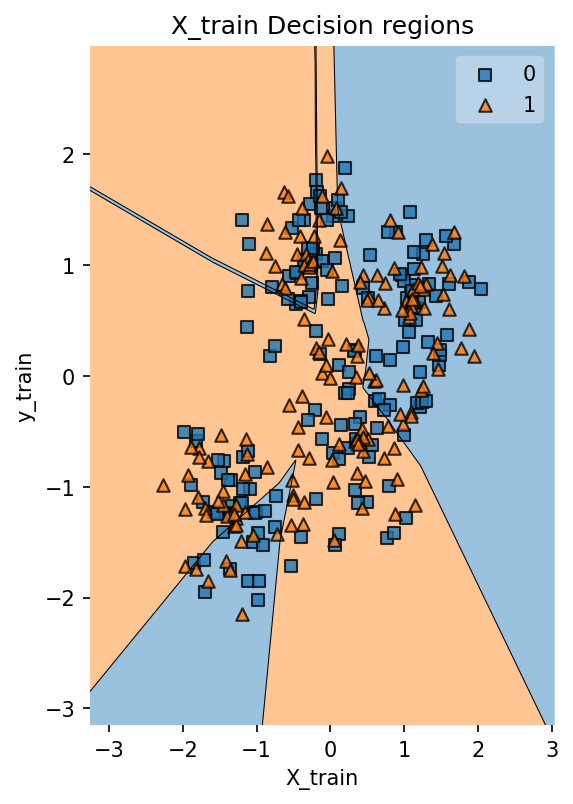

In [28]:
plt.figure(figsize=(4,6),dpi=150)
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions")
plt.xlabel("X_train",color='black')
plt.ylabel("y_train",color='black')
plt.show()

### Making predictions and evaluating accuracy:

- Predicting the outputs for X_tests data.
- Converting the predicted probabilities to binary values (0 or 1) based on a threshold of 0.5.

In [29]:
y_pred=model.predict(X_tests)

In [30]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

### Computing the accuracy score by comparing the predicted values (y_predf) with the actual values (y_test).

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.65

### Plotting the loss curves:
 Plotting the training loss and validation loss curves.


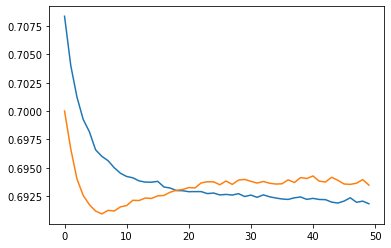

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

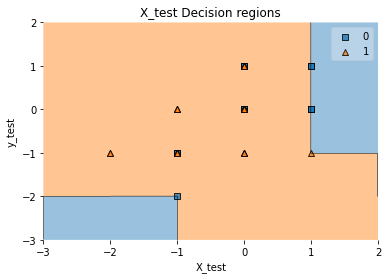

In [33]:

pt(X_tests.astype(int),y_predf,clf=model)
plt.title("X_test Decision regions")
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.show()